# Yelp Data Challenge - NLP

## Main tasks
1. Read in the dataset
2. Define feature variables
3. Define a target variable
4. Create train and test dataset
5. Get NLP representation of the documents
6. Similar review search engine
    - 6.1 Summary on the search engine
7. Classifying positive/negative review
    - 7.1 Naive-Bayes Classifier
    - 7.2 Logistic Regression Classifier
        - 7.2.1 What are the key features (words) that make the positive prediction?
        - 7.2.2 Summary
        - 7.2.3 What are the key features (words) that make the negative prediction?
        - 7.2.4 Summary
    - 7.3 Random Forest Classifier
        - 7.3.1 What features (words) are important by inspecting the RFC model?
    - 7.4 Model Comparison
8. Use cross validation to evaluate your classifiers
    - 8.1 Naive-Bayes Classifier
    - 8.2 Logistic Regression
    - 8.3 Random Forest
9. Use grid search to find best predictable classifier
    - 9.1 Grid search - Naive Bayes
    - 9.2 Grid search - Logistic Regression
    - 9.3 Randomized grid search - Random Forest
    - 9.4 Model comparision

In [1]:
import pandas as pd
import numpy as np

## 1. Read in the dataset

In [2]:
df = pd.read_csv('./dataset/last_2_years_restaurant_reviews.csv',
                 encoding = 'utf-8')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,count,text_length
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,1,341
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,1,417
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,1,493
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,1,152
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,1,914


## 2. Define feature variables
- Here is the text of the review

In [4]:
# Take the values of the text column, and save to a variable named "documents"
documents = df.text.values

In [5]:
# Inspect documents, e.g. check the size
print(documents[0])
print()
print(len(documents))
print()
print(type(documents))
print()
print(type(documents[0]))

This is mine and my fiancé's favorite steakhouse here in Las Vegas! We often stop in and see our favorite server, Michael Jackson, who simply completes the fine dining experience for us. He is always so pleasant and knowledgable about the menu and suggests amazing dishes each time! I have never been disappointed here and will be back soon!

515752

<class 'numpy.ndarray'>

<class 'str'>


## 3. Define a target variable 
#### For example, I am interested in splitting star ratings into perfect (5 stars) and imperfect (1-4 stars)

In [6]:
# Make a column named "target" containing boolean values, either True or False
df['target'] = (df.stars > 4).values

target = df['target'].values

print(target[0:5])
print(type(target))
print(type(target[0]))

[ True False  True  True  True]
<class 'numpy.ndarray'>
<class 'numpy.bool_'>


In [7]:
df.head()

,business_id,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,count,text_length,target
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,1,341,True
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,1,417,False
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,1,493,True
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,1,152,True
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,1,914,True


In [8]:
# Look at the statistics of the target variable
print('mean:', np.mean(target))
print('sd:', np.std(target))

mean: 0.46397299477268145
sd: 0.49870036584541505


## 4.Create train dataset and test dataset

In [9]:
from sklearn.cross_validation import train_test_split

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Documents are Xs, target is y
# Split data into documents_train, documents_test, target_train, target_test (80% & 20% splitting)
documents_train, documents_test, target_train, target_test = train_test_split(documents,
                                                                              target,
                                                                              test_size = 0.2,
                                                                              random_state = 0)

## 5. Get NLP representation of the documents

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [12]:
# Create TfidfVectorizer named vectorizer
# Use 2000 max_features to fast the computation speed
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)

In [13]:
# Vectorize the documents_train 
vectors_train = vectorizer.fit_transform(documents_train).toarray()
print(vectors_train.shape)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(412601, 2000)


In [14]:
# Get the vocabularies
vocab = vectorizer.get_feature_names()

# Since I use max_features = 2000, the length must be equal to 2000
print(len(vocab))

2000


In [15]:
# Vectorize the documents_test 
vectors_test = vectorizer.transform(documents_test).toarray()
print(vectors_test.shape)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(103151, 2000)


## 6. Similar review search engine

In [16]:
# Helper functions
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    # np.argsort by default sorts values in ascending order
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [17]:
# Use the cosine similarity as a distance measurement
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# Draw an arbitrary review from test (unseen in train) documents
random_number = 8
random_review_from_test = documents_test[random_number]

In [19]:
# Transform the drawn review(s) to vector(s)
query = vectorizer.transform([random_review_from_test]).toarray()

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
query.shape

(1, 2000)

In [21]:
# Calculate the similarity score(s) between vector(s) and train vectors
cos_similar_score = cosine_similarity(query,vectors_train)

In [22]:
# Find the top 5 most similar reviews 
n = 5
top_5_similar = get_top_values(cos_similar_score[0], 5, documents_train)

In [23]:
print('My search query:')
print(random_review_from_test)

My search query:
The sports deli had amazing food. I was very impressed. There was a slight wait for the food but it was well worth it. I just have to say that it was really busy and Brian (the one calling the orders out) was doing an excellent job keeping up with the fast pace and gave me excellent customer service. He was very nice and I personally saw him make other guests very happy as well. I really hope management sees the great work Brian and the team is doing. As a frequent Vegas guest, I will for sure be back to the Rio and the Sports Deli because of Brian and his excellent staff. Great job guys!!!


In [24]:
print('Top %s most similar reviews:' % n)
print()
for i, review in enumerate(top_5_similar):
    print('Top '+str(i+1)+' document is:')
    print(review)
    print('\n')

Top 5 most similar reviews:

Top 1 document is:
Excellent food. My first time being  here. Not too busy. Manager was working the registers,  doing a great job.


Top 2 document is:
Had several friends recommend Jasons Deli in the past, So after a rough day at work I decided to check it out,  I've been really craving a decent Deli meal. I was floored! First off excellent customer / management service . Amazing salad bar, and Baked potatoe with all the fixings, fast and quick Reuban was to die for! Alot of bang for your buck. Definitely will be back very soon.


Top 3 document is:
After long time I came again to this place, the new owner doing a great job with the food quality and excellent customer service. It's was good experience and for sure I be back again.


Top 4 document is:
What a wonderful experience we had in this restaurant, first my server Mario on top of everything,then jesus running the food and asking if we need something else,then Yesenia with her wonderful customer serv

#### 6.1 Summary on the search engine
- All top five most similar reviews were pointing out few positive sides about their experience in the restaurants, and sentences were somehow ended with a similar manner such as 'I will come back again'. Another similar point is that all reviews were appraising the food they tasted were very delicious.

## 7. Classifying positive/negative review

### 7.1 Naive-Bayes Classifier

In [25]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = 1)

model.fit(vectors_train, target_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [26]:
# Get the score (accuracy) for the train set
model.score(vectors_train, target_train)

0.8007469686210165

In [27]:
# Get score (accuracy) for the test set
model.score(vectors_test, target_test)

0.8001570513131234

### 7.2 Logistic Regression Classifier

In [28]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(vectors_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Get score for training set
model.score(vectors_train, target_train)

0.8280784583653457

In [30]:
# Get score for test set
model.score(vectors_test, target_test)

0.8253725121423932

#### 7.2.1 What are the key features (words) that make the positive prediction?

In [31]:
# Find it out by ranking the coefficients estimated by the model
n = 20

print(model.coef_.shape)
get_top_values(model.coef_[0], n, vocab)

(1, 2000)


['amazing',
 'best',
 'incredible',
 'awesome',
 'thank',
 'phenomenal',
 'heaven',
 'perfect',
 'perfection',
 'delicious',
 'fantastic',
 'highly',
 'favorite',
 'excellent',
 'outstanding',
 'impeccable',
 'fabulous',
 'notch',
 'bomb',
 'great']

#### 7.2.2 Summary
- To make the positive prediction (stars > 4), positive words such as amazing, best, and incredible were frequently appeared in the reviews. Thus, it's reasonable to use these positive words to make the positive prediction (stars > 4).

#### 7.2.3 What are the key features (words) that make the negative prediction?

In [32]:
# Find it out by ranking the coefficients estimated by the model
n = 20
get_bottom_values(model.coef_[0], n, vocab)

['worst',
 'horrible',
 'disappointing',
 'rude',
 'terrible',
 'bland',
 'ok',
 'mediocre',
 'lacked',
 'okay',
 'lacking',
 'meh',
 'awful',
 'poor',
 'slow',
 'disgusting',
 'tasteless',
 'average',
 'worse',
 'overpriced']

#### 7.2.4 Summary
- To make the negative prediction (stars <= 4), negative words such as worst, horrible, and disappointing were frequently appeared in the reviews. Moreover, one interesting point that mediate words such as ok and okay were appeared in the reviews. Probably, some customers leave these mediate words but still rate a restaurant with 4 stars. Thus, it might be reasonable to use these negative words to make the negative prediction (stars <= 4).

### 7.3 Random Forest Classifier

In [33]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,max_depth=25,min_samples_leaf=5, random_state=1)

model.fit(vectors_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [34]:
# Get score for training set
model.score(vectors_train, target_train)

0.8117891134534332

In [35]:
# Get score for test set
model.score(vectors_test, target_test)

0.7912283933262887

#### 7.3.1 What features (words) are important by inspecting the RFC model?
- In Random Forest, the feature importances are all positive. If the feature importance is higher, this feature (or word) plays an important role in predicting the labels (a positive or negative review). That's why some negative words found in the top 20 features by sorting the feature importances, such as 'bad', 'worst', 'horrible', and so on. Some top words include positive words, such as amazing, best, and great. Both of positive and negative words are important features (words) as they have higher feature importances.

In [36]:
# Select top 20 words
n = 20

# 2000 feature importances provided by RF
print(model.feature_importances_.shape)

get_top_values(model.feature_importances_, n, vocab)

(2000,)


['amazing',
 'best',
 'great',
 'delicious',
 'ok',
 'awesome',
 'love',
 'bad',
 'vegas',
 'didn',
 'wasn',
 'definitely',
 'worst',
 'horrible',
 'good',
 'pretty',
 'minutes',
 'favorite',
 'friendly',
 'excellent']

### 7.4 Model Comparison 
- What do I observe from the training scores and the test scores among three models (NB, LR, RF)?

    A: In Logistic regression and Naive-Bayes models, the difference between training and testing score is extremely close. However, in the Random Forest model, the difference is more significant compared to the results from Logistic Regression and Naive-Bayes models. It indicated that Random Forest, in fact, can't generalized the results to the unseen data (or testing data), and is a high-variance model for this project instance.

## 8. Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

### 8.1 Naive-Bayes Classifier

In [37]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [38]:
from sklearn.naive_bayes import MultinomialNB

metrics = ['accuracy', 'f1_macro', 'roc_auc']

model = MultinomialNB(alpha = 1)

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [39]:
# Look at metric names
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1_macro', 'train_f1_macro', 'test_roc_auc', 'train_roc_auc'])

In [40]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.79903297 0.79894815 0.80065439 0.80070286 0.80038537]
mean_test_accuracy: 0.7999
k-fold variance: 6.2e-07

train_accuracy:
[0.80085434 0.80089978 0.80099733 0.80055502 0.80103732]
mean_train_accuracy: 0.8009

test_f1_macro:
[0.79825726 0.7981565  0.79982051 0.79989785 0.79960756]
mean_test_f1_macro: 0.7991
k-fold variance: 6e-07

train_f1_macro:
[0.80007823 0.8001212  0.80021648 0.79976709 0.80024075]
mean_train_f1_macro: 0.8001

test_roc_auc:
[0.88309949 0.8833065  0.88444077 0.88358017 0.88410702]
mean_test_roc_auc: 0.8837
k-fold variance: 2.5e-07

train_roc_auc:
[0.88457422 0.88458026 0.88444383 0.88457778 0.88469942]
mean_train_roc_auc: 0.8846



In [41]:
print(cv['fit_time'])
print(cv['score_time'])

[52.53176284 49.533324   50.94173622 49.8184278  48.41672301]
[4.61830401 4.41735983 4.56141973 4.43594813 4.70359588]


### 8.2 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [43]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.82496577 0.82467493 0.82615124 0.82493941 0.82519177]
mean_test_accuracy: 0.8252
k-fold variance: 2.6e-07

train_accuracy:
[0.82843553 0.82834464 0.82823004 0.8285027  0.82851837]
mean_train_accuracy: 0.8284

test_f1_macro:
[0.82430858 0.82402084 0.82542237 0.82421098 0.82450557]
mean_test_f1_macro: 0.8245
k-fold variance: 2.4e-07

train_f1_macro:
[0.82775669 0.82766965 0.82756695 0.82783115 0.8278457 ]
mean_train_f1_macro: 0.8277

test_roc_auc:
[0.90613297 0.90675    0.90700127 0.90735674 0.90682389]
mean_test_roc_auc: 0.9068
k-fold variance: 1.6e-07

train_roc_auc:
[0.90974994 0.90960633 0.9095241  0.90943396 0.90959802]
mean_train_roc_auc: 0.9096



In [44]:
print(cv['fit_time'])
print(cv['score_time'])

[53.61101794 53.81115294 52.67874718 56.67140484 53.03661323]
[3.10125303 3.20504379 3.41486001 3.59823418 3.40037394]


### 8.3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_leaf=5, random_state=1)

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [46]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.78776311 0.78800548 0.78875424 0.78887542 0.78693392]
mean_test_accuracy: 0.7881
k-fold variance: 5e-07

train_accuracy:
[0.81177593 0.81139724 0.81243392 0.81200069 0.81253143]
mean_train_accuracy: 0.812

test_f1_macro:
[0.78608405 0.78630419 0.78700511 0.78710365 0.78524449]
mean_test_f1_macro: 0.7863
k-fold variance: 4.6e-07

train_f1_macro:
[0.81047464 0.81007144 0.81116094 0.81068396 0.81123108]
mean_train_f1_macro: 0.8107

test_roc_auc:
[0.8715434  0.87052418 0.87275357 0.87253417 0.86993011]
mean_test_roc_auc: 0.8715
k-fold variance: 1.21e-06

train_roc_auc:
[0.89837349 0.8981251  0.89837115 0.89849785 0.8985774 ]
mean_train_roc_auc: 0.8984



In [47]:
print(cv['fit_time'])
print(cv['score_time'])

[1460.78994489 1490.55910802 1460.17752886 1391.00936294 1543.52303505]
[23.55980325 27.42657423 31.09867001 26.8001442  30.75281096]


## 9. Use grid search to find the best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [48]:
# Define a function to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define a function to plot a roc curve
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
# Define a function to fit a classifier model, and get a model performances
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### 9.1 Grid search - Naive Bayes

In [51]:
# To be implemented
from sklearn import grid_search
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [52]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

param_grid = {"alpha": [0.01, 0.1, 1, 10, 100],
              "fit_prior": [True, False]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_train, target_train)

In [53]:
# see the results on training and testing using the tuned parameters
best_model = grid_job.best_estimator_

              train      test
metrics                      
AUC        0.885847  0.885884
Accuracy   0.801968  0.802348
Precision  0.750567  0.751590
Recall     0.858004  0.859253
f1-score   0.800698  0.801824


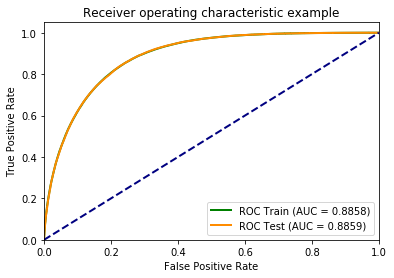

In [54]:
train_test_model(best_model, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.2 Grid search - Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

param_grid = {"penalty": ['l1','l2'],
              "tol": [1e-3, 1e-4, 1e-5],
              "C": [0.1, 1, 10]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_train, target_train)

In [56]:
# see the results on training
best_model = grid_job.best_estimator_

              train      test
metrics                      
AUC        0.909292  0.907254
Accuracy   0.828045  0.825760
Precision  0.807007  0.804605
Recall     0.826848  0.826212
f1-score   0.816807  0.815266


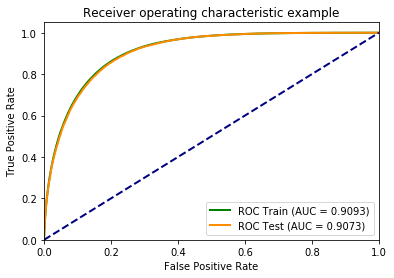

In [57]:
train_test_model(best_model, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.3 Randomized grid search - Random Forest
- Randomly choose 5 combination of parameters to perform grid search due to time limit
- (Reference: How to perform random grid search in sklearn)
    1. https://www.youtube.com/watch?v=Gol_qOgRqfA&frags=pl%2Cwn&ab_channel=DataSchool
    2. http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

In [58]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_dist = {"n_estimators": [50,100,200],
              "max_depth": sp_randint(1, 25),
              "min_samples_leaf": sp_randint(1, 100),
              "random_state": [1]
             }

random_grid = RandomizedSearchCV(estimator = model, param_distributions=param_dist, cv = 5, scoring = 'roc_auc',
                              n_iter=5,
                             )

random_grid.fit(vectors_train, target_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 200], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10f9005c0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10f909b70>, 'random_state': [1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [59]:
print(random_grid.best_score_)
print(random_grid.best_params_)

0.8613411419235731
{'max_depth': 20, 'min_samples_leaf': 82, 'n_estimators': 100, 'random_state': 1}


In [60]:
best_model = random_grid.best_estimator_

              train      test
metrics                      
AUC        0.866287  0.863786
Accuracy   0.782189  0.780506
Precision  0.781213  0.780221
Recall     0.736458  0.735506
f1-score   0.758175  0.757204


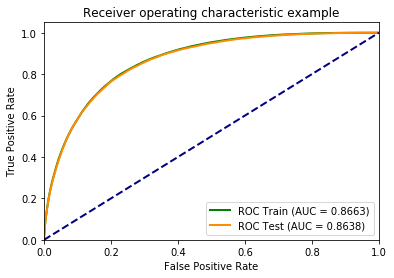

In [61]:
train_test_model(best_model, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.4 Model comparision 
- The best model was determined by the highest score on AUC since I considered TP & FP as important metrics. 
    1. Logistic Regression performed the best among three models. The test AUC is 0.9072 and it is a very fast model to fit. The model variance between train and test is also steady by looking at the score difference of each metric between train and test.
    
    2. Naive Bayes produced a steady prediction result too. Only a small difference, 0.02, on the test AUC score compared with the Logistic Regression.
    
    3. Random Forest achieved 0.8638 on AUC score, which ranked in third place and it required more time to fit.